In [0]:
%matplotlib inline

In [2]:
!pip install torchsummary
!pip install albumentations
from torchsummary import summary

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/Common/')

In [0]:
from models import *
from utils import *
from data_loaders import *
from train import *
import validation as test
from graph import *
from albumentation import *
from albumentations import Normalize, HorizontalFlip, VerticalFlip, Rotate, Cutout
from gradCAM import *

In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
BATCH_SIZE = 128
EPOCHS = 20
device = getDevice()
dataloader_args = getDataLoaderArgs(BATCH_SIZE)
train_data_transforms_list = [Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
                              Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=0.5),
                              HorizontalFlip(),
                                # Rotate(limit=45)
                                ]
train_data_transfomrs = getAlbumTransformation(train_data_transforms_list)
trainloader = getTrainDataLoader("CIFAR", dataloader_args, train_data_transfomrs)
test_data_transforms_list = [Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]
test_data_transfomrs = getAlbumTransformation(test_data_transforms_list)
testloader = getTestDataLoader("CIFAR", dataloader_args, test_data_transfomrs)
model = MyResNet18().to(device)
summary(model, input_size=(3, 32, 32))



CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
      

In [13]:
from torch.optim.lr_scheduler import StepLR, CyclicLR
optimizer = getOptimizer(model, weight_decay=0.0005)
scheduler = CyclicLR(optimizer, base_lr=0.01, max_lr=0.1)
for epoch in range(EPOCHS):
  print('EPOCH : ', epoch)
  train(model, device, trainloader, optimizer)
  scheduler.step()
  test.__test(model, device, testloader)
  

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH :  0


Loss=1.0785363912582397 Batch_id=390 Accuracy=50.29: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.1523, Accuracy: 5751/10000 (57.51%)

EPOCH :  1


Loss=0.8163504600524902 Batch_id=390 Accuracy=68.99: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.8226, Accuracy: 7053/10000 (70.53%)

EPOCH :  2


Loss=0.7788024544715881 Batch_id=390 Accuracy=75.55: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.6115, Accuracy: 7337/10000 (73.37%)

EPOCH :  3


Loss=0.4277288019657135 Batch_id=390 Accuracy=79.52: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.5708, Accuracy: 7830/10000 (78.30%)

EPOCH :  4


Loss=0.6893340945243835 Batch_id=390 Accuracy=82.04: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.2137, Accuracy: 7493/10000 (74.93%)

EPOCH :  5


Loss=0.3859120011329651 Batch_id=390 Accuracy=83.88: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.0200, Accuracy: 7382/10000 (73.82%)

EPOCH :  6


Loss=0.38003724813461304 Batch_id=390 Accuracy=85.39: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.2240, Accuracy: 8290/10000 (82.90%)

EPOCH :  7


Loss=0.36822304129600525 Batch_id=390 Accuracy=86.55: 100%|██████████| 391/391 [00:32<00:00, 11.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.2450, Accuracy: 8326/10000 (83.26%)

EPOCH :  8


Loss=0.22174902260303497 Batch_id=390 Accuracy=87.78: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.1651, Accuracy: 8480/10000 (84.80%)

EPOCH :  9


Loss=0.2861153483390808 Batch_id=390 Accuracy=88.40: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.7487, Accuracy: 8528/10000 (85.28%)

EPOCH :  10


Loss=0.6086071133613586 Batch_id=390 Accuracy=89.42: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.1033, Accuracy: 8440/10000 (84.40%)

EPOCH :  11


Loss=0.3947509229183197 Batch_id=390 Accuracy=90.11: 100%|██████████| 391/391 [00:33<00:00, 11.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9909, Accuracy: 8412/10000 (84.12%)

EPOCH :  12


Loss=0.19442568719387054 Batch_id=390 Accuracy=90.86: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.5110, Accuracy: 8691/10000 (86.91%)

EPOCH :  13


Loss=0.3166079521179199 Batch_id=390 Accuracy=91.47: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.6909, Accuracy: 7619/10000 (76.19%)

EPOCH :  14


Loss=0.1229972392320633 Batch_id=390 Accuracy=91.88: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.9045, Accuracy: 8731/10000 (87.31%)

EPOCH :  15


Loss=0.08233432471752167 Batch_id=390 Accuracy=92.41: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.8761, Accuracy: 8748/10000 (87.48%)

EPOCH :  16


Loss=0.1884934902191162 Batch_id=390 Accuracy=92.60: 100%|██████████| 391/391 [00:33<00:00, 11.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.4555, Accuracy: 8515/10000 (85.15%)

EPOCH :  17


Loss=0.3918984830379486 Batch_id=390 Accuracy=93.31: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.7333, Accuracy: 8688/10000 (86.88%)

EPOCH :  18


Loss=0.20434021949768066 Batch_id=390 Accuracy=93.64: 100%|██████████| 391/391 [00:33<00:00, 11.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.0163, Accuracy: 8633/10000 (86.33%)

EPOCH :  19


Loss=0.12222020328044891 Batch_id=390 Accuracy=93.81: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]



Test set: Average loss: -11.5054, Accuracy: 8737/10000 (87.37%)



In [7]:
!mkdir savedModels
import torch
modelName = 'cifar_myresnet18'
torch.save(model.state_dict(), "./savedModels/"+modelName+".pt")

mkdir: cannot create directory ‘savedModels’: File exists


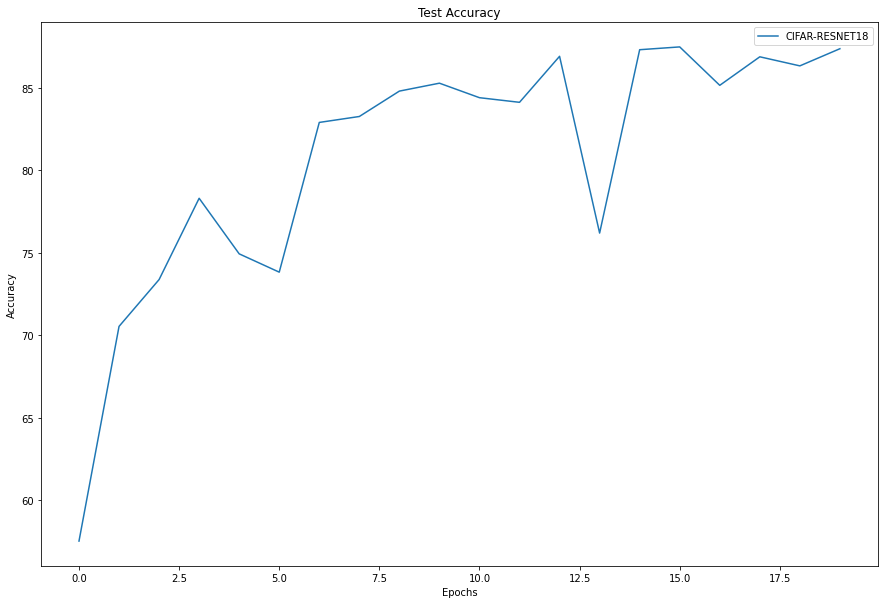

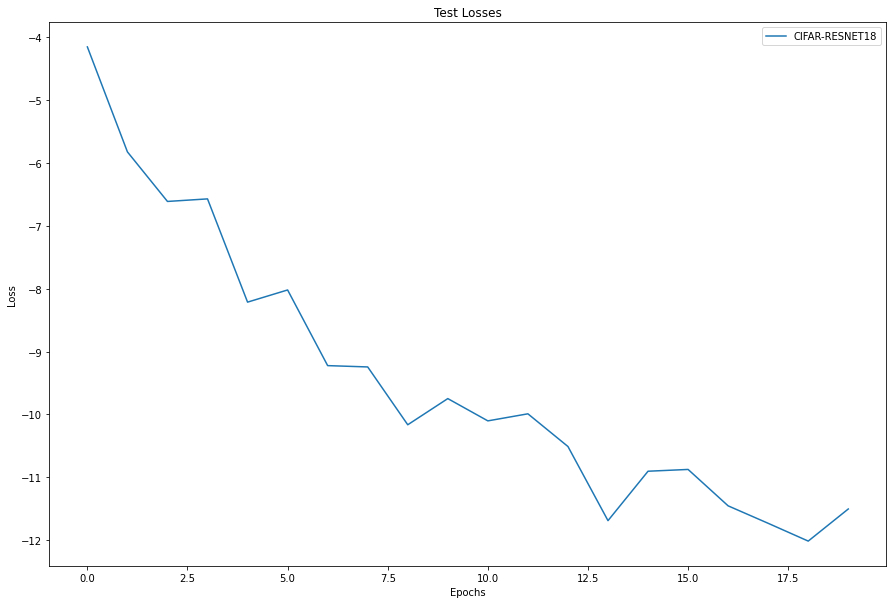

In [17]:
all_test_acc = {'CIFAR-RESNET18':test.test_acc}
plotGraph(all_test_acc, "Test Accuracy","Epochs", "Accuracy")
all_test_loss = {'CIFAR-RESNET18':test.test_losses}
plotGraph(all_test_loss, "Test Losses","Epochs", "Loss")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

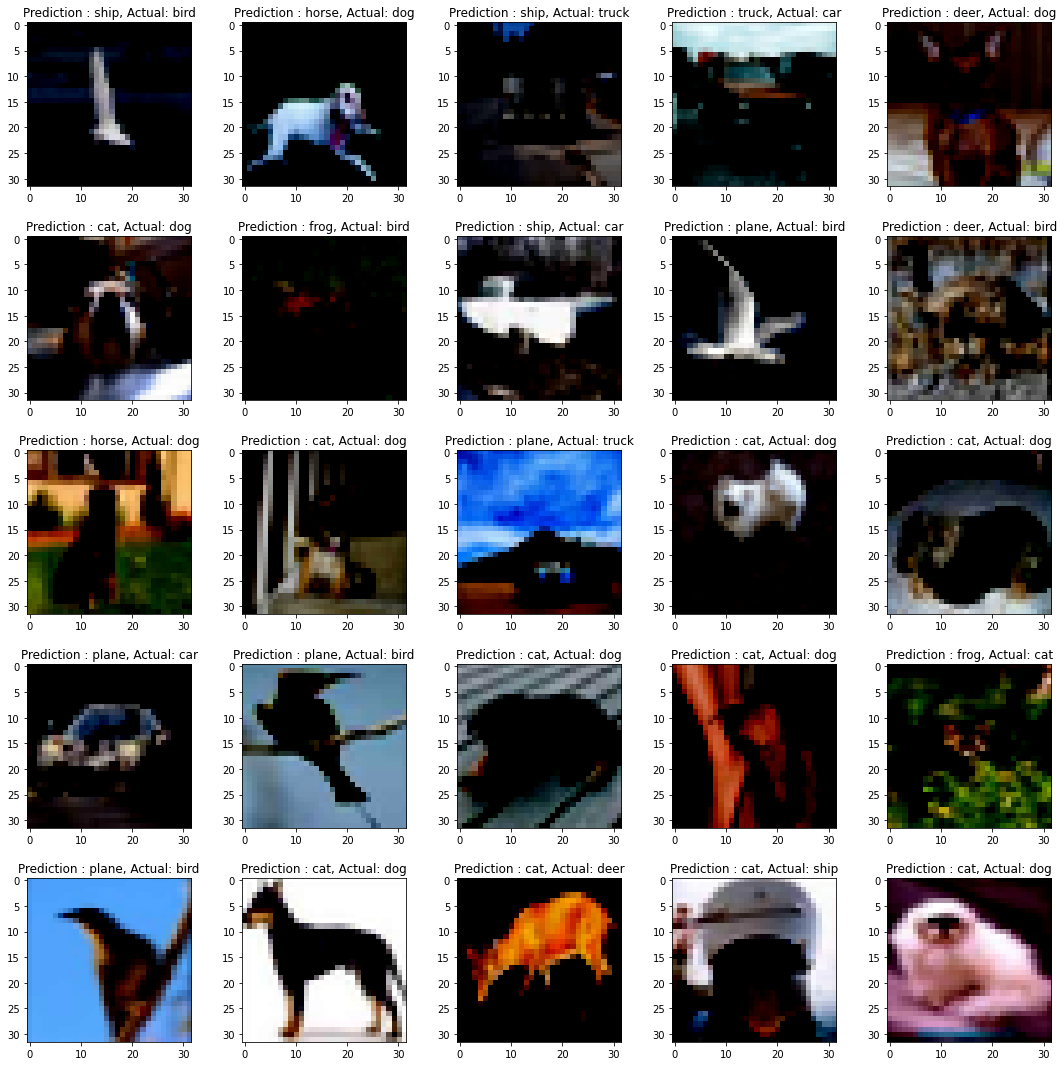

In [8]:
getMisclassifiedImages(ResNet18(), testloader, device, 'savedModels/'+modelName+'.pt', classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or 

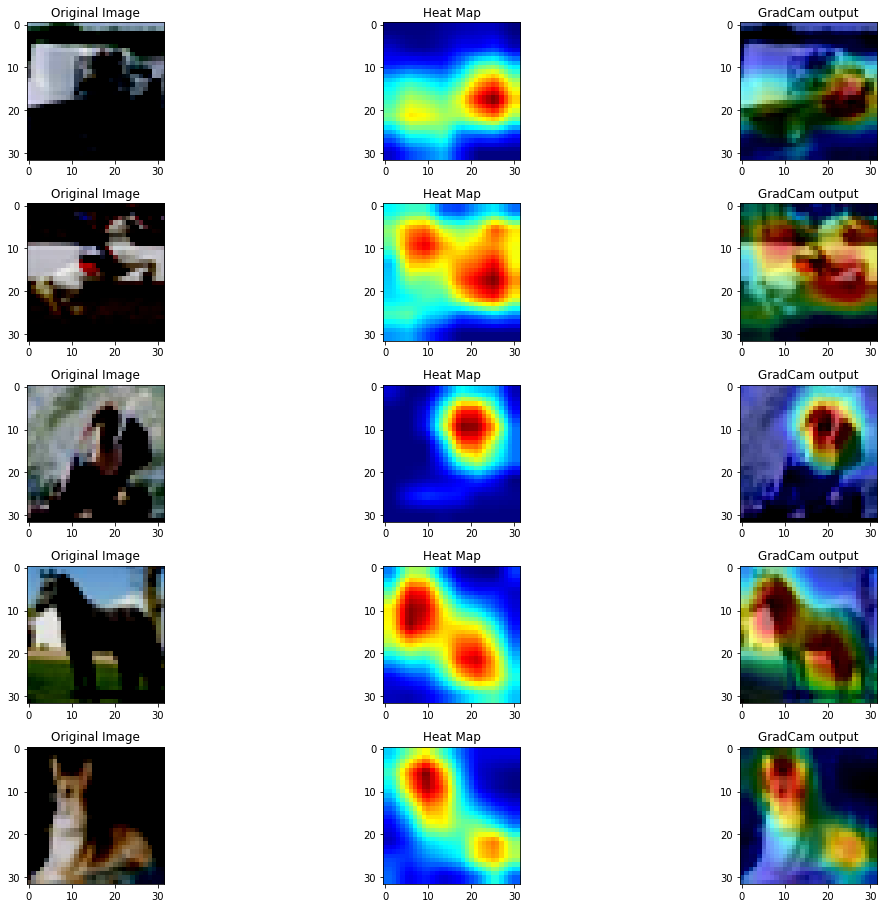

In [9]:
getGradCamOutput(MyResNet18(), 'resnet', 'savedModels/'+modelName+'.pt', 'layer4', testloader, device, 5)